# Bias in EuroSAT

The EuroSAT dataset is a land-cover satellite image classification use-case on 13 spectral bands consisting on 10 classes and containing 27000 labeled and geo-referenced examples. As we will be placing ourselves in the *fairness* frame of work, we will be simplyfying our problem to a Highway/River binary classification problem, where we also know that a small percentage of images (~3\% of the whole dataset) has a certain blue-veiled property. As we will prove later, this group of images constitutes a discriminated group in the sense of the equality of odds/errors.
To identify these images, we will transform the images to the HSV color-space, and use custom thresholds in the mean of each channel to flag each image as either discriminated (blue-veiled, S=0) or not (S=1). In particular, we fix this threshold at 0.35 for the saturation channel, 0.4 for the value, and verify that the hue's value is between 210 and 270. With this information, we can calculate some statistics about the dataset.

## Imports

In [1]:
# General Imports
import plotly.express as px

# Augmentare Imports
from utils import plot_wrong_pred, plot_bar_err_rate, plot_loss_acc_train,\
                plot_bar_acc_simu_simple, plot_err_rate_simu_simple,\
                plot_bar_acc_simu_double, plot_err_rate_simu_double,\
                plot_err_rate_test, plot_acc_test, plot_err_rate_test_double,\
                plot_heatmap_accuracy, plot_heatmap_err_rate,\
                average_seeds, get_acc_err_rate, get_dataframe

/home/vuong.nguyen/vuong/augmentare/dev_augmentare/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
save_path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/Exp/Output_ResNet18"

## Simulation with Flow

First we will test the FDA neural type transfer method. We will test the model Resnet18 with the blue highway and blue river images pairs added to the original Dataset. In this section, we only set `Requires_grad=True` for the classification layer that is the FC layer of the Resnet18 to evaluate, but in the next section, we will put `Requires_grad=True` for all to get the good classification.

In [3]:
nbs_highway = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
nbs_river = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [4]:
path = "/home/vuong.nguyen/vuong/augmentare/Bias in EuroSAT/NST_output/Flow/ResNet18"
accuracy, error_rate = average_seeds(path=path, nb_seeds=10)

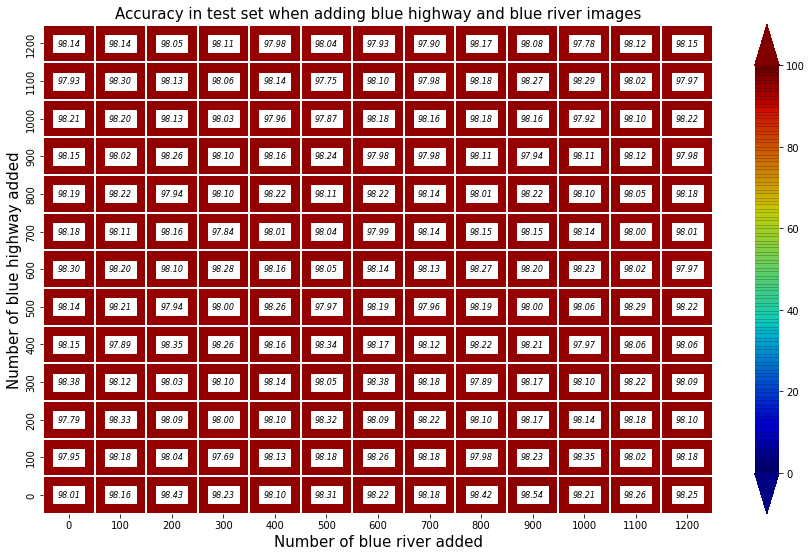

In [5]:
plot_heatmap_accuracy(accuracy, nbs_highway, nbs_river)

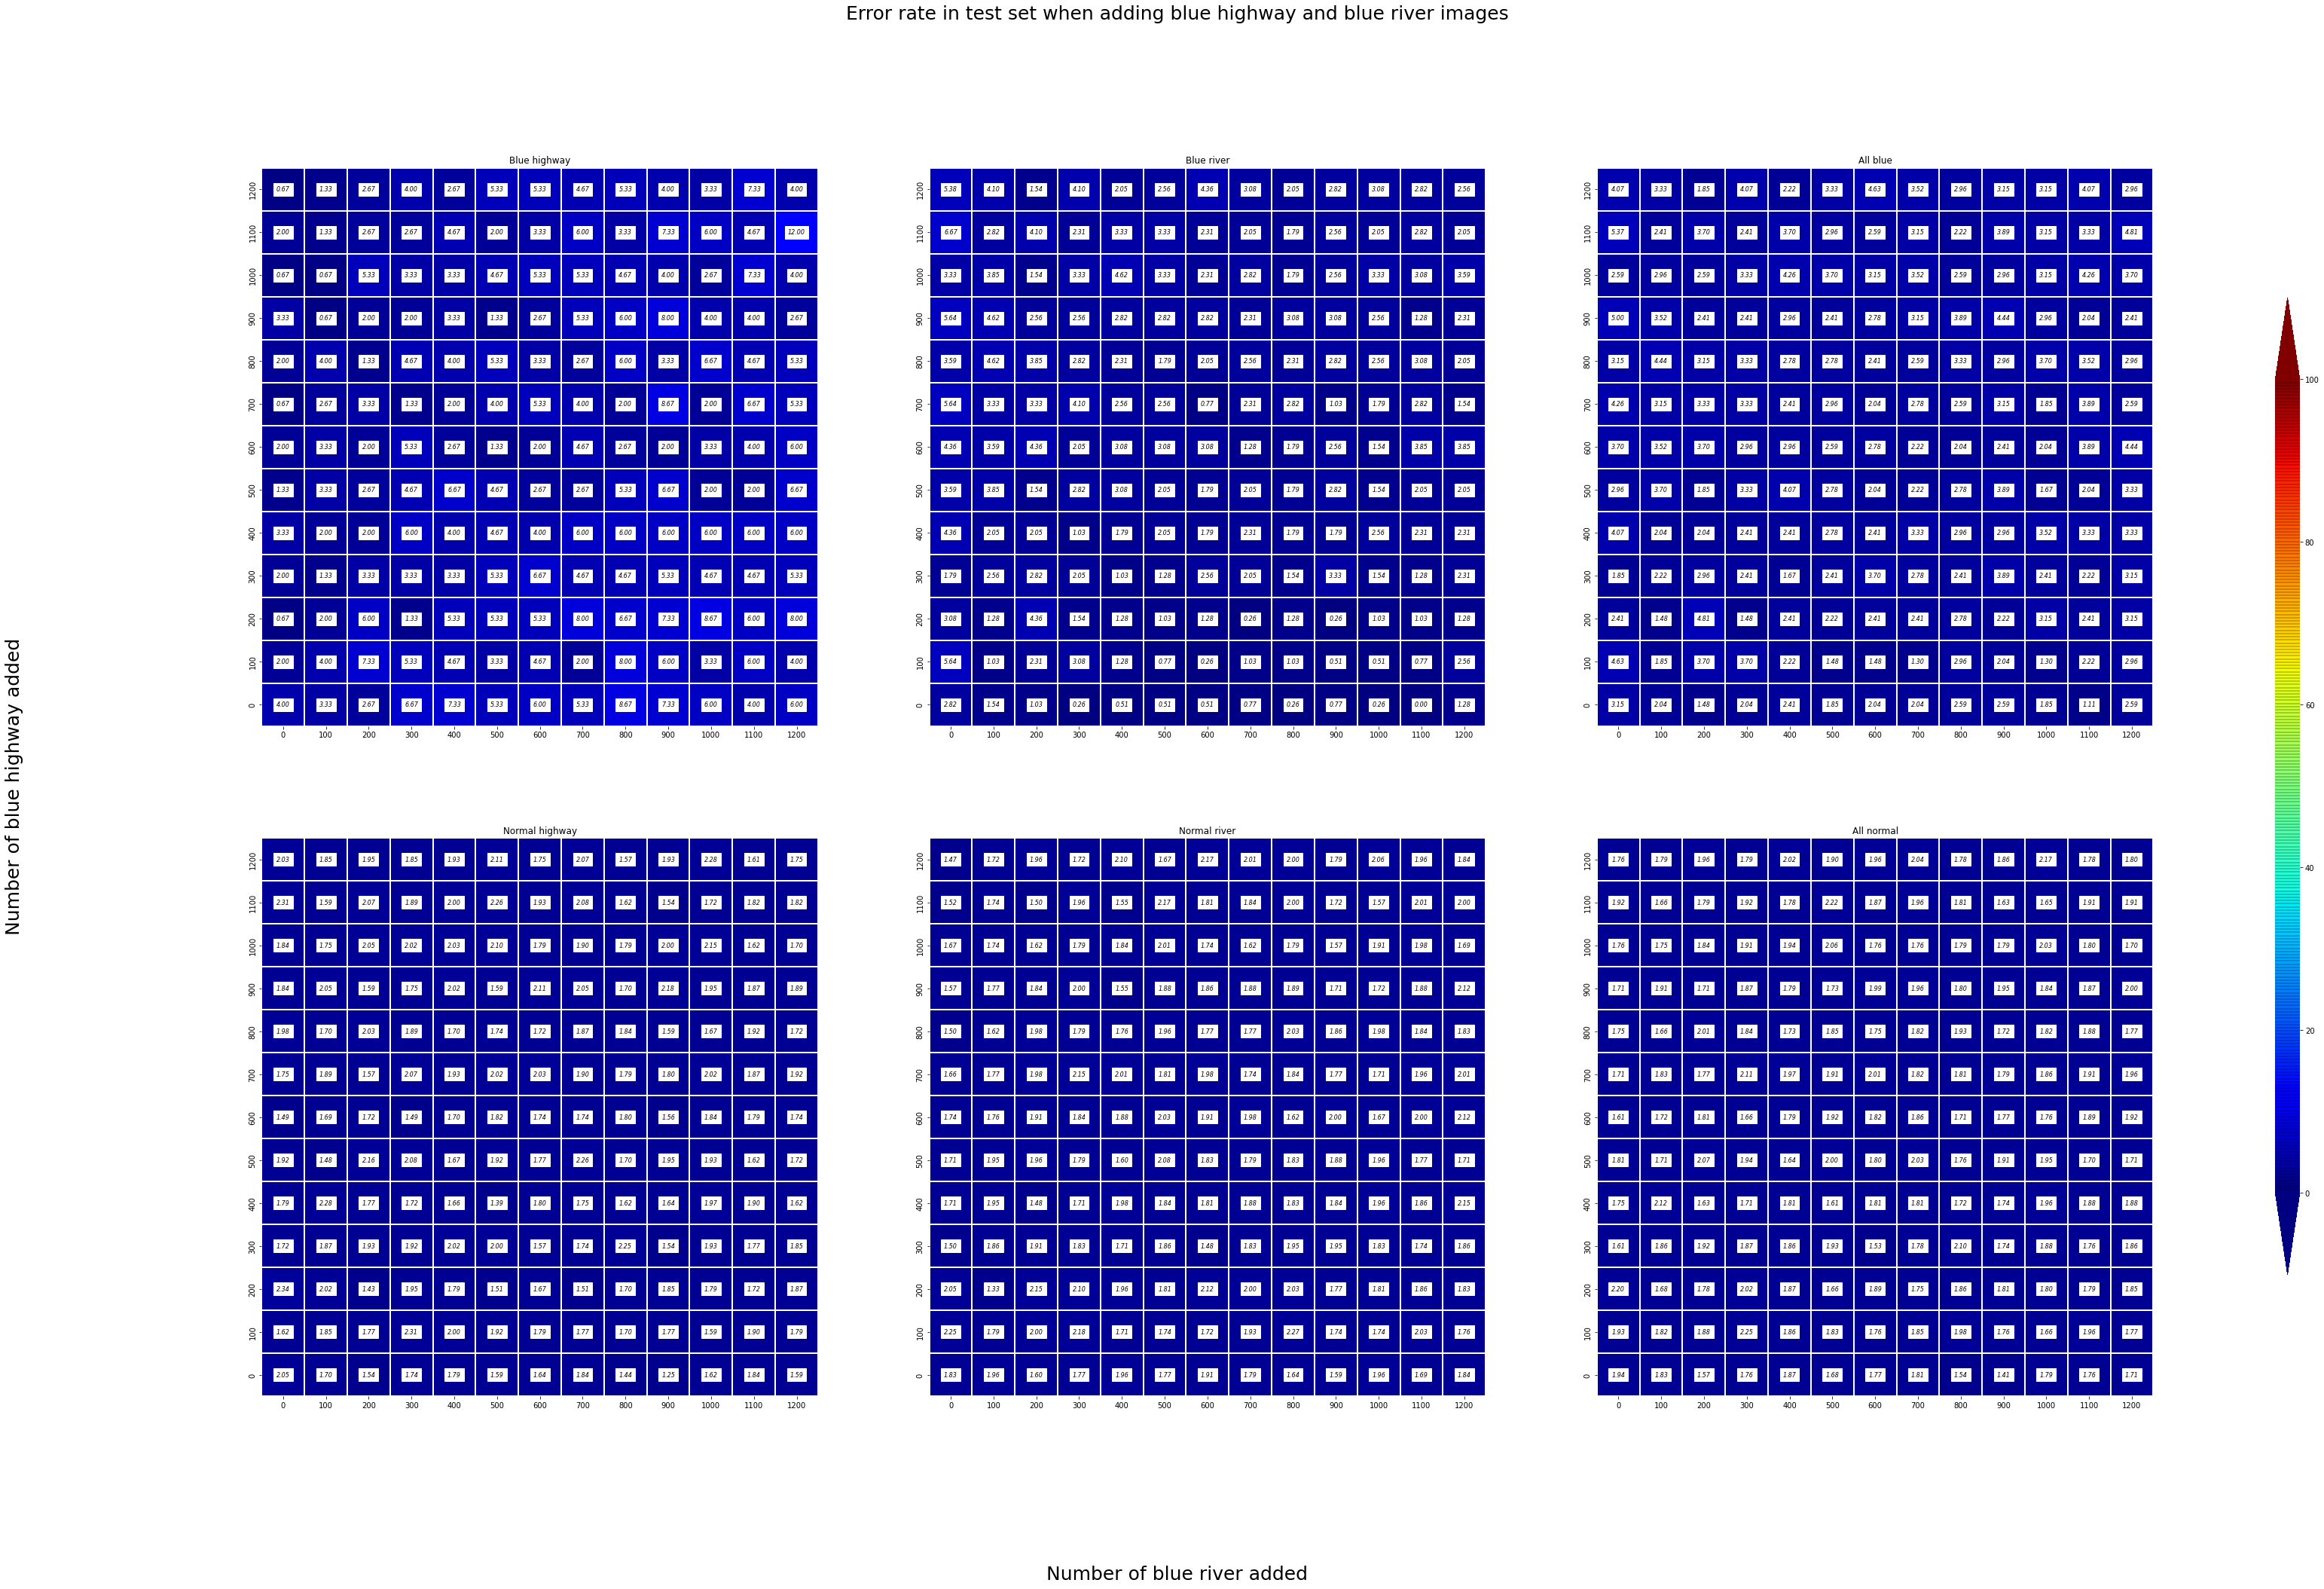

In [6]:
plot_heatmap_err_rate(error_rate, nbs_highway, nbs_river)

The above is the result of the model's cccuracy and the error rates of the image groups in the test set. From there we select a pair of number of HW and RV optimally to add the original dataset. We will take the pair [800, 600].